In [1]:
# import basic library
import numpy as np
import pandas as pd

In [2]:
# buka dataframe
df_heart_disease = pd.read_csv('data\\heart-disease.csv')
df_heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# pisahin variabel fitur dan variabel target
X = df_heart_disease.drop('target', axis=1)
y = df_heart_disease['target']

In [4]:
# import train dan test modul
from sklearn.model_selection import train_test_split
np.random.seed(42)

# pisahin data untuk train dan test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [5]:
# import estimator random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

# fit data untuk train
rfc.fit(X_train, y_train);

In [6]:
# prediksi y berdasarkan X_test
y_pred = rfc.predict(X_test)

In [7]:
# ubah y_test dan y_pred jadi array dulu
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# baru ubah jadi series
y_test = pd.Series(y_test)
y_pred = pd.Series(y_pred)

# bikin dictionary untuk kolom dan isi kolom
df = {'y_test': y_test, 'y_pred':y_pred}

# bikin ke bentuk dataframe
dataframe = pd.DataFrame(df)

In [8]:
y_prob = rfc.predict_proba(X_test)

In [9]:
# bikin nama kolom untuk hasil probabilitas
kolom = ['tidak terdeteksi', 'terdeteksi']

# bikin dataframe probabilitas
probability = pd.DataFrame(y_prob, columns=kolom)

In [10]:
#gabugngin kolom dari dataframe probabilitas ke dataframe
dataframe['persentase'] = probability['terdeteksi']

#transpose biar keliatan
# dataframe.to_csv('dataframe.csv')
dataframe

,y_test,y_pred,persentase
0,0,0,0.11
1,0,1,0.51
2,1,1,0.57
3,0,0,0.16
4,1,1,0.82
...,...,...,...
56,0,0,0.29
57,1,1,0.99
58,0,0,0.13
59,0,0,0.00


# 1. score evaluation

In [11]:
# cek skor estimator
rfc.score(X_test, y_test)

0.8524590163934426

# 2. confusion metrics evaluation

In [12]:
from sklearn.metrics import confusion_matrix

matriks = confusion_matrix(y_test, y_pred)
matriks

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [13]:
# ubah y_test dan y_pred jadi array dulu
y_test = np.array(y_test)
y_pred = np.array(y_pred)

pd.crosstab(y_test,
            y_pred,
            rownames=['Aktual'],
            colnames=['Prediksi'])

Prediksi,0,1
Aktual,,
0,24,5
1,4,28


In [14]:
# import matplotlib untuk visualisasi heatmap
import matplotlib.pyplot as plt
import seaborn as sns

if I don't have seaborn

`import sys
 !conda install --sys --prefix {sys.prefix} seaborn`

In [15]:
# bikin fungsi biar engga ribet
def plot_heatmap (matriks):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(matriks,
                     annot=True,
                     cbar=False)

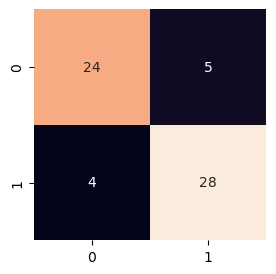

In [16]:
plot_heatmap (matriks)

# 3. cross validation evaluation

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(rfc, X, y, cv=5)
np.mean(cross_val_score)

0.811639344262295

# 4. classification report evaluation

In [18]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print (report)

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



# tuning hyperparameters

### fungsi evaluasi

In [19]:
# bikin fungsi evaluasi biar engga perlu bikin berulang
def evaluasi_prediksi (y_true, y_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    metric_dict = {'accuracy':round(accuracy, 2),
                   'precision':round(precision, 2),
                   'recall':round(recall, 2),
                   'f1':round(f1, 2)}
    print (f'Accuracy: {accuracy*100:.2f}%')
    print (f'Precision: {precision:.2f}')
    print (f'Recall: {recall:.2f}')
    print (f'F1: {f1:.2f}')
    
    return metric_dict

### tuning by hand

In [20]:
# import library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

# pisah fitur dan target di dataframe
X = df_heart_disease.drop('target', axis=1)
y = df_heart_disease['target']

# bikin train data dan remaining data
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.7)

# bikin vallid dan test data dari remaining data
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, train_size=0.5)

In [21]:
train_valid_test = {'X_train':(len(X_train)),
                    'y_train':(len(y_train)),
                    'X_valid':(len(X_valid)),
                    'y_valid':(len(y_valid)),
                    'X_test':(len(X_test)),
                    'y_test':(len(y_test))}

train_valid_test

{'X_train': 212,
 'y_train': 212,
 'X_valid': 45,
 'y_valid': 45,
 'X_test': 46,
 'y_test': 46}

In [22]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_valid)

metrics = evaluasi_prediksi(y_valid, y_pred)
metrics

Accuracy: 80.00%
Precision: 0.78
Recall: 0.88
F1: 0.82


{'accuracy': 0.8, 'precision': 0.78, 'recall': 0.88, 'f1': 0.82}

### tuning by randomizedsearchcv

In [23]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

X = df_heart_disease.drop('target', axis=1)
y = df_heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

rfc = RandomForestClassifier(n_jobs=1)

rs_rfc = RandomizedSearchCV(estimator=rfc,
                            param_distributions=grid,
                            n_iter=10,
                            cv=5,
                            verbose=2)

In [24]:
rs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.6s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.7s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   2.8s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, mi

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [25]:
rs_rfc.best_params_

{'n_estimators': 10,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [26]:
rs_y_pred = rs_rfc.predict(X_test)

rs_metrics = evaluasi_prediksi(y_test, rs_y_pred)
rs_metrics

Accuracy: 85.25%
Precision: 0.87
Recall: 0.84
F1: 0.86


{'accuracy': 0.85, 'precision': 0.87, 'recall': 0.84, 'f1': 0.86}

In [27]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

### tuning with gridsearchcv

In [28]:
grid_2 = {'n_estimators': [10, 100, 200],
          'max_depth': [None, 5, 10],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2,]}

In [29]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = df_heart_disease.drop('target', axis=1)
y = df_heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

rfc = RandomForestClassifier(n_jobs=1)

gs_rfc = GridSearchCV(estimator=rfc,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)

In [30]:
gs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_dept

[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [6],
                         'n_estimators': [10, 100, 200]},
             verbose=2)

In [31]:
gs_rfc.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [32]:
gs_y_pred = gs_rfc.predict(X_test)

gs_metrics = evaluasi_prediksi(y_test, gs_y_pred)
gs_metrics

Accuracy: 85.25%
Precision: 0.85
Recall: 0.88
F1: 0.86


{'accuracy': 0.85, 'precision': 0.85, 'recall': 0.88, 'f1': 0.86}

# bikin plot untuk bandingin tuning

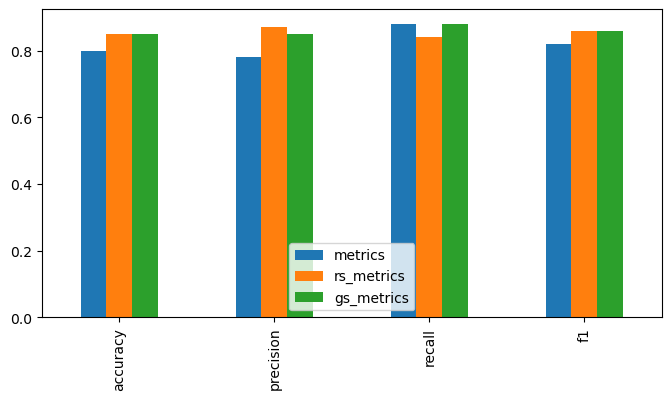

In [33]:
compare_metrics = pd.DataFrame({'metrics': metrics,
                   'rs_metrics': rs_metrics,
                   'gs_metrics': gs_metrics})
compare_metrics.plot.bar(figsize=(8, 4));

# save dan load model

### pake pickle

In [34]:
import pickle

pickle.dump(gs_rfc, open('GS_RandomForestClassifier.pkl', 'wb'))

In [35]:
load_model_from_pickle = pickle.load(open('GS_RandomForestClassifier.pkl', 'rb'))

pickle_y_pred = load_model_from_pickle.predict(X_test)
evaluasi_prediksi(y_test, pickle_y_pred)

Accuracy: 85.25%
Precision: 0.85
Recall: 0.88
F1: 0.86


{'accuracy': 0.85, 'precision': 0.85, 'recall': 0.88, 'f1': 0.86}

### pake joblib

In [36]:
import joblib

joblib.dump(gs_rfc, filename='GS_RandomForestClassifier.joblib')

['GS_RandomForestClassifier.joblib']

In [37]:
load_model_from_joblib = joblib.load(filename='GS_RandomForestClassifier.joblib')

joblib_y_pred = load_model_from_joblib.predict(X_test)
evaluasi_prediksi(y_test, joblib_y_pred)

Accuracy: 85.25%
Precision: 0.85
Recall: 0.88
F1: 0.86


{'accuracy': 0.85, 'precision': 0.85, 'recall': 0.88, 'f1': 0.86}